In [1]:
# Polynomial Regression

In [2]:
# 1. Create a function that generates a number according to the follow equation.
# y = x**3 + 0.5 * np.random.normal(0,1,1)

from random import randint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math 
from math import sqrt

def y_generator(x):
    return x**3 + 0.5 * np.random.normal(0,1,1)

print(y_generator(10))

[999.771586]


----X values for training set----
[-1.98112458 -1.51372352 -1.45317364 -0.88652246 -0.30192964  0.17361977
  0.30037332  0.68299634  1.30341102  1.37910453]

----Y values for training set----
[-7.64812515 -3.69749732 -2.85110484 -0.98853509  0.38089918  0.34159397
 -0.02510465  0.05296668  2.72920563  2.4038915 ]


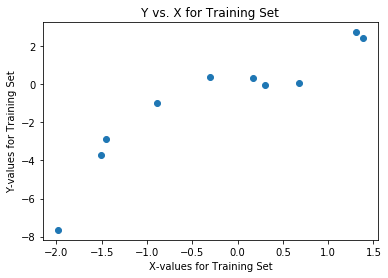

In [3]:
# Generate a training set of 10 random (x,y) pairs
#Allows a tuple of values to be used as input
f2 = np.vectorize(y_generator)

np.random.seed(100)

#Getting 10 x-values from the x data set
X_training = np.sort(np.random.uniform(-2,2,10))
#Getting 10 y-values from the y data set that has been computed 
y_training = f2(X_training)

print("----X values for training set----")
print(X_training)

print()
print("----Y values for training set----")
print(y_training)

%matplotlib inline
#Plots the data points in the training set
plt.plot(X_training,y_training,'o')
plt.xlabel('X-values for Training Set')
plt.ylabel('Y-values for Training Set')
plt.title('Y vs. X for Training Set')
plt.show()

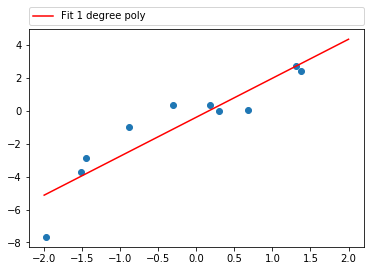

In [4]:
# 2. Fit the following polynomials to the training set:

# 2.A. Degree 1 Polynomial (a line)
X_new = np.linspace(-2,2)

model1 = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', linear_model.LinearRegression())])
model1 =model1.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])

y_new1 = model1.predict(X_new[:, np.newaxis])

#Plotting the degree 1 fit on the test data
plt.scatter(X_training, y_training)
plt.plot(X_new, y_new1, 'r', label="Fit "+str(1)+ " degree poly")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
plt.show()

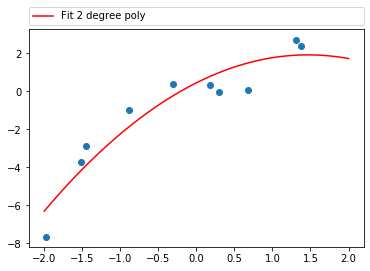

In [5]:
# 2.B. Degree 2 Polynomial (a quadratic)
model2 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', linear_model.LinearRegression())])
model2 =model2.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])

y_new2 = model2.predict(X_new[:, np.newaxis])

#Plotting the degree 1 fit on the test data
plt.scatter(X_training, y_training)
plt.plot(X_new, y_new2, 'r', label="Fit "+str(2)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
#plt.xlim(0,3)
#plt.ylim(0,1.3)

plt.show()

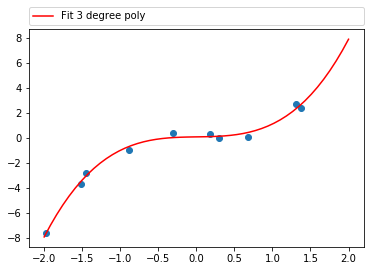

In [6]:
# 2.C. Degree 3 Polynomial (a cubic)

model3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', linear_model.LinearRegression())])
model3 =model3.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])

y_new3 = model3.predict(X_new[:, np.newaxis])

#Plotting the degree 1 fit on the test data
plt.scatter(X_training, y_training)
plt.plot(X_new, y_new3, 'r', label="Fit "+str(3)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
#plt.xlim(0,3)
#plt.ylim(0,1.3)

plt.show()

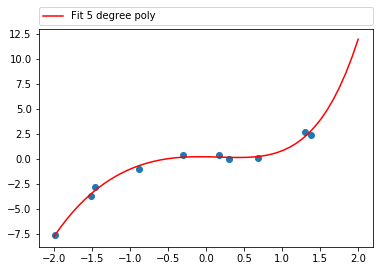

In [7]:
# 2.D. Degree 5 Polynomial
model5 = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', linear_model.LinearRegression())])
model5 =model5.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])

y_new5 = model5.predict(X_new[:, np.newaxis])

#Plotting the degree 1 fit on the test data
plt.scatter(X_training, y_training)
plt.plot(X_new, y_new5, 'r', label="Fit "+str(5)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
#plt.xlim(0,3)
#plt.ylim(0,1.3)

plt.show()

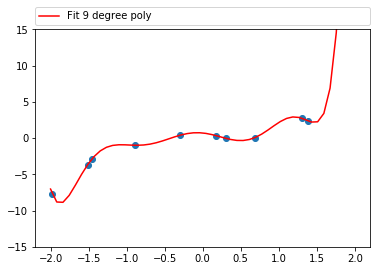

In [8]:
# 2.E. Degree 9 Polynomial
model9 = Pipeline([('poly', PolynomialFeatures(degree=9)),('linear', linear_model.LinearRegression())])
model9 =model9.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])

y_new9 = model9.predict(X_new[:, np.newaxis])

#Plotting the degree 1 fit on the test data
plt.scatter(X_training, y_training)
plt.plot(X_new, y_new9, 'r', label="Fit "+str(9)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
#plt.xlim(0,3)
plt.ylim(-15,15)

plt.show()

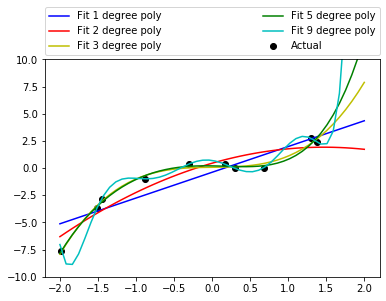

In [9]:
# 3. Combine Graphs

plot_config=['b', 'r', 'y', 'g', 'c']
plt.scatter(X_training, y_training, color = 'black', marker = 'o', label="Actual")
# 3. Set the polynomial degree to be fitted betwee 1 and 3
d_degree = [1,2,3,5,9]
i = 0
for degree in d_degree:
    # 5. Create a fit a polynomial with sk-learn LinearRegression
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),('linear', linear_model.LinearRegression())])
    model=model.fit(X_training[:,np.newaxis], y_training[:,np.newaxis])
    
    predict_sk=model.predict(X_new[:,np.newaxis])
    
    plt.plot(X_new, predict_sk, plot_config[i], label="Fit "+str(degree)+ " degree poly")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
    #plt.xlim(0,3)
    plt.ylim(-10,10)
    i = i+1

plt.show()

----X values for test set----
[-1.97724597e+00 -9.90294586e-01  1.18265003e+00 -1.93898012e+00
  3.95373508e-01  4.15218156e-01 -1.57940926e+00 -4.72226220e-01
 -1.85409577e+00  1.56164625e+00  1.92368343e+00 -1.76023204e+00
  1.56218378e+00  3.07605998e-01  9.69918756e-01  5.20735746e-01
  3.27368770e-01 -1.91824347e+00 -1.15989369e+00  1.78739513e-01
  1.07646068e+00 -9.97219083e-01 -8.56417238e-01  1.40958035e+00
  1.90002597e+00  1.53941317e+00 -5.61968624e-01  3.95435784e-01
 -5.80817553e-01 -6.39239139e-01 -1.28767604e+00 -1.04922317e+00
 -1.82055087e+00  2.17257185e-02 -4.94990183e-01  3.71221604e-01
  5.19767502e-01 -1.42959874e+00  1.73536520e+00  1.78551952e+00
  4.09186631e-01 -4.48934879e-01 -5.47247984e-01 -1.18261889e+00
 -8.92939754e-01 -1.01385648e+00 -1.30556799e+00  1.86643878e+00
  1.82805040e+00  3.91894737e-01  9.25203012e-01 -6.38459109e-01
 -1.63177759e+00 -1.46007924e-01  3.47955730e-02 -1.64615931e+00
  1.12140893e-01  1.96863215e+00 -4.19856273e-01 -6.57614233

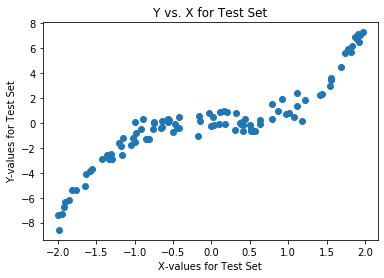

In [10]:
# 4. Test the models
X_test = np.random.uniform(-2,2,100)
y_test = f2(X_test)

print("----X values for test set----")
print(X_test)

print()
print("----Y values for test set----")
print(y_test)

%matplotlib inline
#Plots the data points in the test set
#plt.xlim(0,3)
#plt.ylim(0,1.3)
plt.plot(X_test,y_test,'o')
plt.xlabel('X-values for Test Set')
plt.ylabel('Y-values for Test Set')
plt.title('Y vs. X for Test Set')
plt.show()

In [11]:
# 5. The results
#Root mean squared error 
y_predictions1 = model1.predict(X_test[:, np.newaxis])
rms1 = sqrt(mean_squared_error(y_test,y_predictions1))
print('Root mean square error for Degree 1')
print(rms1)


#Root mean squared error 
y_predictions2 = model2.predict(X_test[:, np.newaxis])
rms2 = sqrt(mean_squared_error(y_test,y_predictions2))
print('Root mean square error for Degree 2')
print(rms2)

#Root mean squared error 
y_predictions3 = model3.predict(X_test[:, np.newaxis])
rms3 = sqrt(mean_squared_error(y_test,y_predictions3))
print('Root mean square error for Degree 3')
print(rms3)

#Root mean squared error 
y_predictions5 = model5.predict(X_test[:, np.newaxis])
rms5 = sqrt(mean_squared_error(y_test,y_predictions5))
print('Root mean square error for Degree 5')
print(rms5)

#Root mean squared error 
y_predictions9 = model9.predict(X_test[:, np.newaxis])
rms9 = sqrt(mean_squared_error(y_test,y_predictions9))
print('Root mean square error for Degree 9')
print(rms9)

Root mean square error for Degree 1
1.4902410023308104
Root mean square error for Degree 2
1.8292871801491588
Root mean square error for Degree 3
0.5385454583069078
Root mean square error for Degree 5
1.0665111079926162
Root mean square error for Degree 9
12.374312194588164


In [ ]:
# The best model is the Degree 3 polynomial since it has the lowest mean square error.